In [ ]:
import pandas as pd
import glob
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
#normal=[]
#Pneumonia=[]

In [ ]:
normal_path = glob.glob("Data/normal/*.jpeg")
len(normal_path)
#for img in normal_path:
 #   normal.append(cv2.imread(img))
#len(normal)

1341

In [ ]:
Pneumonia_path = glob.glob("Data/pneumonia/*.jpeg")
len(Pneumonia_path)
#for imge in Pneumonia_path:
 #   Pneumonia.append(cv2.imread(img))
#len(Pneumonia)

3875

In [ ]:
import os
os.getcwd()

'/Users/pawarbharath/Downloads/Mysql_Blobs/model_file'

In [ ]:
os.chdir('/Users/pawarbharath/Downloads/lung_poc/Data/normal')

In [ ]:
normal_images = os.listdir()

In [ ]:
pneumonia_images = os.listdir('/Users/pawarbharath/Downloads/lung_poc/Data/pneumonia')

In [ ]:
normal=len(normal_images)
pneumonia=len(pneumonia_images)

In [ ]:
normal,pneumonia

(1342, 3876)

/Users/pawarbharath/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
1342 3876


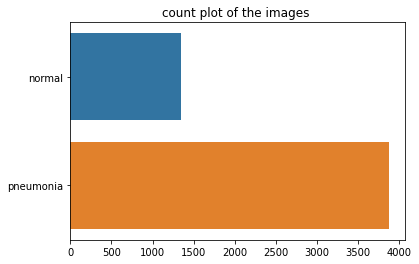

In [ ]:

yaxis =[normal,pneumonia]
xaxis=["normal","pneumonia"]
plt.title("count plot of the images ")
sns.barplot(yaxis,xaxis)
print({1342:"normal",3876:"pneumonia")

In [ ]:
#First, we can start by simply looking at a few randomly sampled images

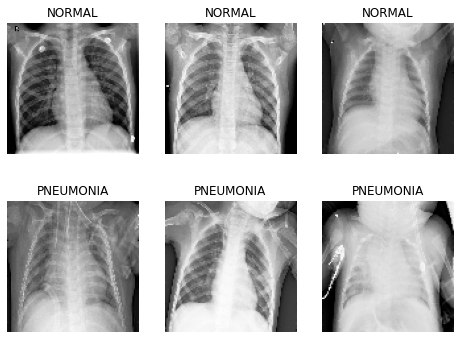

This step will pull random images from each sub-folders and display them


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
%matplotlib inline

train_dir = "/Users/pawarbharath/Downloads/lung_poc/Data" # image folder


# get the list of jpegs from sub image class folders
normal_imgs = [fn for fn in os.listdir(f'{train_dir}/normal') if fn.endswith('.jpeg')]
pneumo_imgs = [fn for fn in os.listdir(f'{train_dir}/pneumonia') if fn.endswith('.jpeg')]

# randomly select 3 of each
select_norm = np.random.choice(normal_imgs, 3, replace = False)
select_pneu = np.random.choice(pneumo_imgs, 3, replace = False)

# plotting 2 x 3 image matrix
fig = plt.figure(figsize = (8,6))
for i in range(6):
    if i < 3:
        fp = f'{train_dir}/normal/{select_norm[i]}'
        label = 'NORMAL'
    else:
        fp = f'{train_dir}/pneumonia/{select_pneu[i-3]}'
        label = 'PNEUMONIA'
    ax = fig.add_subplot(2, 3, i+1)
    
    # to plot without rescaling, remove target_size
    fn = image.load_img(fp, target_size = (100,100), color_mode='grayscale')
    plt.imshow(fn, cmap='Greys_r')
    plt.title(label)
    plt.axis('off')
plt.show()

# also check the number of files here
len(normal_imgs), len(pneumo_imgs)
print("This step will pull random images from each sub-folders and display them")

In [ ]:
#Images as Matrix
#For the next few steps, we will work directly with the pixel values of each image so we can do operations on them. We can accomplish this by converting our images into a Numpy array
#This function will iterate through each file and turn them into an (n, m) matrix, where n is the number of observations and m is the number of pixels

In [ ]:
# making n X m matrix
def img2np(path, list_of_filename, size = (64, 64)):
    # iterating through each file
    for fn in list_of_filename:
        fp = path + fn
        current_image = image.load_img(fp, target_size = size, 
                                       color_mode = 'grayscale')
        # covert image to a matrix
        img_ts = image.img_to_array(current_image)
        # turn that into a vector / 1D array
        img_ts = [img_ts.ravel()]
        try:
            # concatenate different images
            full_mat = np.concatenate((full_mat, img_ts))
        except UnboundLocalError: 
            # if not assigned yet, assign one
            full_mat = img_ts
    return full_mat

# run it on our folders
normal_images = img2np(f'{train_dir}/normal/', normal_imgs)
pnemonia_images = img2np(f'{train_dir}/pneumonia/', pneumo_imgs)

In [ ]:
#Average Image
#Now let’s see what the average image looks like for each class. To compute the average image, we can take the average value of each pixel across all observations.
#We can see from the average image that pneumonia X-rays tend to show higher obstruction around the chest area.

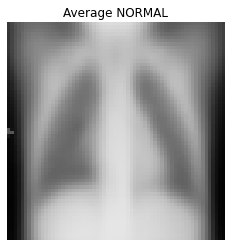

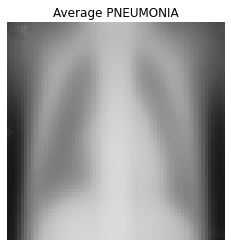

In [ ]:
def find_mean_img(full_mat, title, size = (64, 64)):
    # calculate the average
    mean_img = np.mean(full_mat, axis = 0)
    # reshape it back to a matrix
    mean_img = mean_img.reshape(size)
    plt.imshow(mean_img, vmin=0, vmax=255, cmap='Greys_r')
    plt.title(f'Average {title}')
    plt.axis('off')
    plt.show()
    return mean_img

norm_mean = find_mean_img(normal_images, 'NORMAL')
pneu_mean = find_mean_img(pnemonia_images, 'PNEUMONIA')

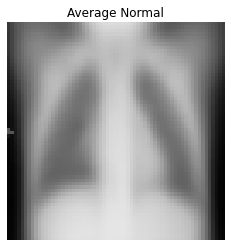

In [ ]:
mean_img_normal = np.mean(normal_images, axis = 0)
    # reshape it back to a matrix
mean_img_normal = mean_img_normal.reshape(64,64)
plt.imshow(mean_img_normal, vmin=0, vmax=255, cmap='Greys_r')
plt.title(f'Average Normal')
plt.axis('off')
plt.show()
    


In [ ]:
#Contrast Between Average Images
#Using the average images, we can also compute the difference.


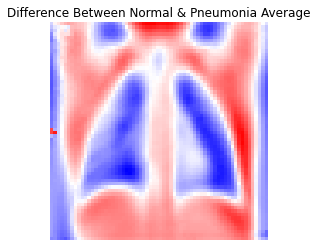

In [ ]:
contrast_mean = norm_mean - pneu_mean
plt.imshow(contrast_mean, cmap='bwr')
plt.title(f'Difference Between Normal & Pneumonia Average')
plt.axis('off')
plt.show()

In [ ]:
#Variability
#Similarly, we can also look at which area is most variable in either class by computing variance instead of the mean. Here the lighter area indicates higher variability. Again we can see that in pneumonia X-rays, there is more variability within the lungs

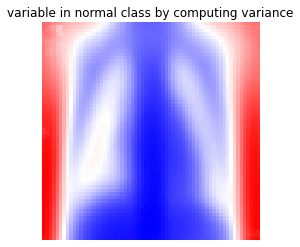

In [ ]:
variablity = contrast_mean - norm_mean
plt.imshow(variablity, cmap='bwr')
plt.title(f'variable in normal class by computing variance')
plt.axis('off')
plt.show()

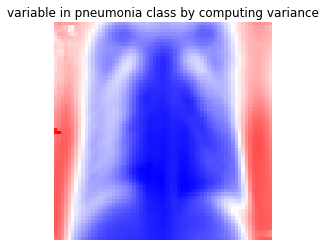

In [ ]:
variablity1 = contrast_mean - pneu_mean
plt.imshow(variablity1, cmap='bwr')
plt.title(f'variable in pneumonia class by computing variance')
plt.axis('off')
plt.show()

In [ ]:
mean_img = np.mean(pnemonia_images, axis = 0)
    # reshape it back to a matrix
mean_img_pneumonia = mean_img.reshape(64,64)
print(mean_img_pneumonia.shape)

(64, 64)


(-0.5, 63.5, 63.5, -0.5)

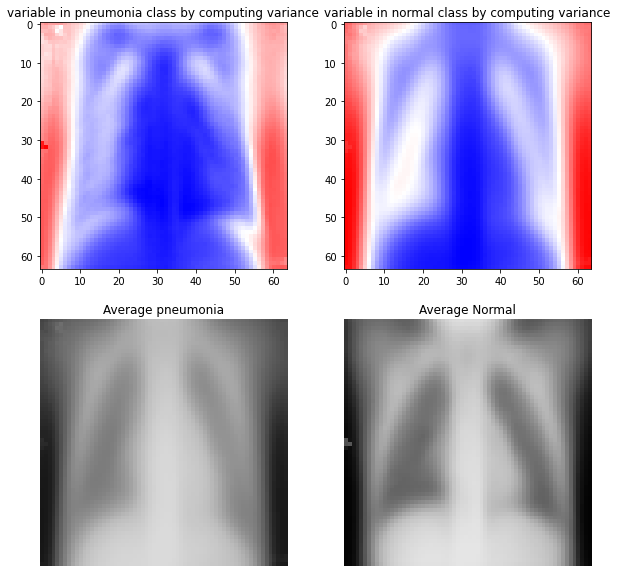

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(variablity1,cmap="bwr")
plt.title("variable in pneumonia class by computing variance")
plt.subplot(2,2,2)
plt.imshow(variablity,cmap="bwr")
plt.title("variable in normal class by computing variance")
plt.subplot(2,2,4)
plt.imshow(mean_img_normal, vmin=0, vmax=255, cmap='Greys_r')
plt.title(f'Average Normal')
plt.axis('off')
plt.subplot(2,2,3)
plt.imshow(mean_img_pneumonia, vmin=0, vmax=255, cmap='Greys_r')
plt.title(f'Average pneumonia')
plt.axis('off')


In [ ]:
#Lastly, we can use a dimension reduction technique such as the principal component analysis (PCA) to visualize the components that describe each class the best. The eigenimages, which is essentially the eigenvectors (components) of PCA of our image matrix, can be reshaped into a matrix and be plotted. It’s also called eigenfaces as this approach was first used for facial recognition research. Here we will visualize the principal components that describe 70% of variability for each class.

Number of PC:  28


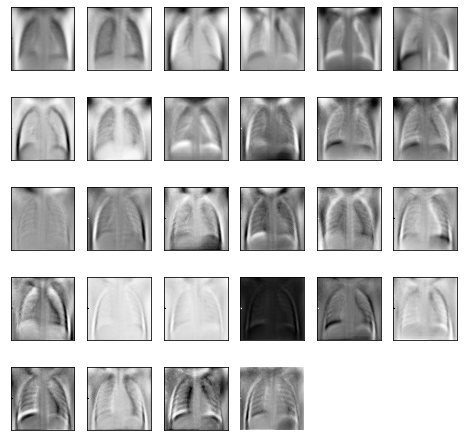

Number of PC:  14


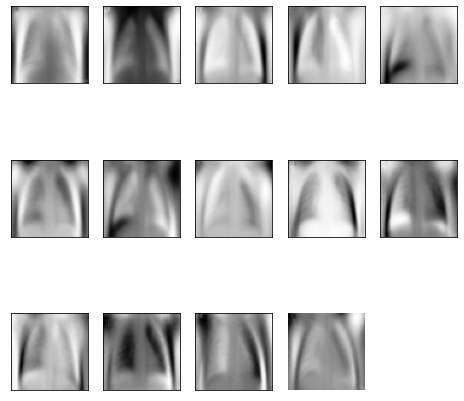

In [ ]:
from sklearn.decomposition import PCA
from math import ceil

def eigenimages(full_mat, title, n_comp = 0.7, size = (64, 64)):
    # fit PCA to describe n_comp * variability in the class
    pca = PCA(n_components = n_comp, whiten = True)
    pca.fit(full_mat)
    print('Number of PC: ', pca.n_components_)
    return pca
  
def plot_pca(pca, size = (64, 64)):
    # plot eigenimages in a grid
    n = pca.n_components_
    fig = plt.figure(figsize=(8, 8))
    r = int(n**.5)
    c = ceil(n/ r)
    for i in range(n):
        ax = fig.add_subplot(r, c, i + 1, xticks = [], yticks = [])
        ax.imshow(pca.components_[i].reshape(size), 
                  cmap='Greys_r')
    plt.axis('off')
    plt.show()
    
plot_pca(eigenimages(normal_images, 'NORMAL'))
plot_pca(eigenimages(pnemonia_images, 'PNEUMONIA'))

{'bacteria': 2531, 'virus': 1345, 'normal': 2531}


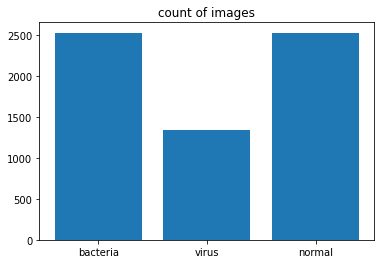

In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
bacteria=len(os.listdir("/Users/pawarbharath/Downloads/lung_poc/Data/bacteria"))
virus=len(os.listdir("/Users/pawarbharath/Downloads/lung_poc/Data/viral"))
normal=len(os.listdir("/Users/pawarbharath/Downloads/lung_poc/Data/bacteria"))
x=["bacteria","virus","normal"]
y=[bacteria,virus,normal]
plt.bar(x,y)
plt.title("count of images")
print({"bacteria":bacteria,"virus":virus,"normal":normal})